In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc = {'figure.figsize':(20,10)})

In [2]:
# Read the data
df = pd.read_csv('train.csv')
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [4]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols

['Name',
 'Location',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'New_Price']

In [5]:
for col in cat_cols:
    print(df[col].value_counts())
    print('------------')

Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Honda City 1.5 S MT              34
Maruti Swift Dzire VDI           34
Maruti Swift VDI BSIV            31
                                 ..
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Hyundai i20 1.2 Era               1
Toyota Camry W4 (AT)              1
Mahindra Xylo D4 BSIV             1
Name: Name, Length: 1876, dtype: int64
------------
Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64
------------
Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64
------------
Manual       4299
Automatic    1720
Name: Transmission, dtype: int64
------------
First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owne

# Cleaning

In [6]:
del df['New_Price']

In [7]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [8]:
# Percantage of null values in DataFrame
(df.isna().sum()/df.shape[0])*100

Name                 0.000000
Location             0.000000
Year                 0.000000
Kilometers_Driven    0.000000
Fuel_Type            0.000000
Transmission         0.000000
Owner_Type           0.000000
Mileage              0.033228
Engine               0.598106
Power                0.598106
Seats                0.697790
Price                0.000000
dtype: float64

In [9]:
df.dropna(inplace=True)

In [10]:
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [11]:
# column(Name)
def split(x):
    l = x.split(' ')
    return l[0] + ' ' + l[1]
df['Name'] = df['Name'].apply(split)

In [12]:
df['Name'].value_counts()

Maruti Swift         343
Honda City           265
Hyundai i20          247
Hyundai Verna        170
Toyota Innova        164
                    ... 
Volkswagen Beetle      1
Fiat Petra             1
Volkswagen Tiguan      1
Mini Clubman           1
Jaguar F               1
Name: Name, Length: 213, dtype: int64

In [13]:
#column (Year)
df['Year'].unique()

array([2010, 2015, 2011, 2012, 2013, 2016, 2018, 2014, 2017, 2007, 2009,
       2008, 2019, 2006, 2005, 2004, 2002, 2000, 2003, 1999, 2001, 1998],
      dtype=int64)

In [14]:
#column (Mileage)
df['Mileage'].unique()

array(['26.6 km/kg', '19.67 kmpl', '18.2 kmpl', '20.77 kmpl', '15.2 kmpl',
       '21.1 km/kg', '23.08 kmpl', '11.36 kmpl', '20.54 kmpl',
       '22.3 kmpl', '21.56 kmpl', '16.8 kmpl', '25.2 kmpl', '12.7 kmpl',
       '0.0 kmpl', '13.5 kmpl', '25.8 kmpl', '28.4 kmpl', '20.45 kmpl',
       '14.84 kmpl', '22.69 kmpl', '23.65 kmpl', '13.53 kmpl',
       '18.5 kmpl', '14.4 kmpl', '20.92 kmpl', '17.5 kmpl', '12.8 kmpl',
       '19.01 kmpl', '14.53 kmpl', '11.18 kmpl', '12.4 kmpl',
       '16.09 kmpl', '14.0 kmpl', '24.3 kmpl', '18.15 kmpl', '11.74 kmpl',
       '22.07 kmpl', '19.7 kmpl', '25.4 kmpl', '25.32 kmpl', '14.62 kmpl',
       '14.28 kmpl', '14.9 kmpl', '11.25 kmpl', '24.4 kmpl', '16.55 kmpl',
       '17.11 kmpl', '22.9 kmpl', '17.8 kmpl', '18.9 kmpl', '15.04 kmpl',
       '25.17 kmpl', '20.36 kmpl', '13.29 kmpl', '13.68 kmpl',
       '20.0 kmpl', '15.8 kmpl', '25.0 kmpl', '16.4 kmpl', '24.52 kmpl',
       '22.1 kmpl', '8.5 kmpl', '15.1 kmpl', '16.95 kmpl', '19.64 kmpl',
       '16.

In [15]:
def trans(y):
    y = y.split(' ')
    if y[-1] == 'km/kg':
        return float(y[0])
    elif y[-1] == 'kmpl':
        return float(y[0]) * 1.61
df['Mileage'] = df['Mileage'].apply(trans)

In [16]:
# For Test
df['Mileage'].value_counts()

30.4290    172
27.3700    170
29.9460    119
32.7796     88
33.9710     86
          ... 
23.4577      1
23.0713      1
22.8000      1
12.8800      1
27.7564      1
Name: Mileage, Length: 442, dtype: int64

In [17]:
df['Mileage'] = pd.to_numeric(df['Mileage'])

In [18]:
# column (Engine)
df['Engine'].unique()

array(['998 CC', '1582 CC', '1199 CC', '1248 CC', '1968 CC', '814 CC',
       '1461 CC', '2755 CC', '1598 CC', '1462 CC', '1497 CC', '2179 CC',
       '2477 CC', '1498 CC', '2143 CC', '1995 CC', '1984 CC', '1197 CC',
       '2494 CC', '1798 CC', '2696 CC', '2698 CC', '1061 CC', '1198 CC',
       '2987 CC', '796 CC', '624 CC', '1999 CC', '1991 CC', '2694 CC',
       '1120 CC', '2498 CC', '799 CC', '2393 CC', '1399 CC', '1796 CC',
       '2148 CC', '1396 CC', '1950 CC', '4806 CC', '1998 CC', '1086 CC',
       '1193 CC', '2982 CC', '1493 CC', '2967 CC', '2993 CC', '1196 CC',
       '1799 CC', '2497 CC', '2354 CC', '1373 CC', '2996 CC', '1591 CC',
       '2894 CC', '5461 CC', '1595 CC', '936 CC', '1997 CC', '1896 CC',
       '1390 CC', '1364 CC', '2199 CC', '993 CC', '999 CC', '1405 CC',
       '2956 CC', '1794 CC', '995 CC', '2496 CC', '1599 CC', '2400 CC',
       '1495 CC', '2523 CC', '793 CC', '4134 CC', '1596 CC', '1395 CC',
       '2953 CC', '1586 CC', '2362 CC', '1496 CC', '1368 CC',

In [19]:
def split(x):
    l = x.split(' ')
    return l[0]
df['Engine'] = df['Engine'].apply(split)

In [20]:
df['Engine'] = pd.to_numeric(df['Engine'])

In [21]:
df['Power'].values

array(['58.16 bhp', '126.2 bhp', '88.7 bhp', ..., '112 bhp', '67.1 bhp',
       '57.6 bhp'], dtype=object)

In [22]:
df['Power'] = df['Power'].apply(split)

In [23]:
df['Power'] = pd.to_numeric(df['Power'], errors= 'coerce')

In [24]:
df.dropna(inplace=True)

In [25]:
df.corr()['Price']

Year                 0.299475
Kilometers_Driven   -0.008249
Mileage             -0.333874
Engine               0.658047
Power                0.772843
Seats                0.055547
Price                1.000000
Name: Price, dtype: float64

In [26]:
df.describe(include='object')

,Name,Location,Fuel_Type,Transmission,Owner_Type
count,5872,5872,5872,5872,5872
unique,207,11,4,2,4
top,Maruti Swift,Mumbai,Diesel,Manual,First
freq,327,775,3152,4170,4839


In [27]:
df['Owner_Type'].value_counts()

First             4839
Second             925
Third              101
Fourth & Above       7
Name: Owner_Type, dtype: int64

In [28]:
owner_Type = {'First':1 , 'Second':2,'Third':3}
df['Owner_Type'] = df['Owner_Type'].map(owner_Type)

In [29]:
df.dropna(inplace=True)

In [30]:
df.sample(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2758,Maruti Swift,Coimbatore,2018,61386,Diesel,Manual,1.0,40.5720,1248,74.0,5.0,7.05
324,Honda City,Kolkata,2008,40000,Petrol,Manual,1.0,28.4970,1497,78.0,5.0,1.80
4659,Honda City,Mumbai,2016,42000,Petrol,Manual,1.0,28.6580,1497,117.3,5.0,9.25
351,Skoda Octavia,Jaipur,2005,100000,Petrol,Automatic,1.0,23.2645,1984,227.0,5.0,2.05
1215,Volkswagen Polo,Bangalore,2012,75000,Petrol,Manual,2.0,26.5167,1198,73.9,5.0,3.95


In [31]:
df.describe()

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price
count,5865.000000,5.865000e+03,5865.000000,5865.000000,5865.000000,5865.000000,5865.000000,5865.000000
mean,2013.484569,5.823829e+04,1.192157,29.269981,1625.430861,113.286687,5.282864,9.611124
std,3.159765,9.215378e+04,0.435553,6.912135,601.598315,53.901221,0.804121,11.254145
min,1998.000000,1.710000e+02,1.000000,0.000000,624.000000,34.200000,2.000000,0.440000
25%,2012.000000,3.337200e+04,1.000000,24.568600,1198.000000,75.000000,5.000000,3.530000
50%,2014.000000,5.251600e+04,1.000000,29.285900,1495.000000,97.700000,5.000000,5.750000
75%,2016.000000,7.220200e+04,1.000000,33.971000,1985.000000,138.100000,5.000000,10.050000
max,2019.000000,6.500000e+06,3.000000,45.724000,5998.000000,560.000000,10.000000,160.000000


In [32]:
df.quantile([0.01,0.25,0.5,0.75,0.95,0.97,0.99,0.995,1])

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price
0.010,2004.0,4000.0,1.0,15.1000,796.00,38.400,4.0,0.9900
0.250,2012.0,33372.0,1.0,24.5686,1198.00,75.000,5.0,3.5300
0.500,2014.0,52516.0,1.0,29.2859,1495.00,97.700,5.0,5.7500
0.750,2016.0,72202.0,1.0,33.9710,1985.00,138.100,5.0,10.0500
0.950,2018.0,120000.0,2.0,40.8940,2982.00,204.000,7.0,32.5160
0.970,2018.0,135000.0,2.0,41.8600,2987.00,241.688,7.0,39.5832
0.990,2019.0,170000.0,3.0,45.2249,2997.72,288.480,8.0,56.2696
0.995,2019.0,199680.0,3.0,45.7240,3565.32,335.200,8.0,67.0000
1.000,2019.0,6500000.0,3.0,45.7240,5998.00,560.000,10.0,160.0000


<AxesSubplot:ylabel='Price'>

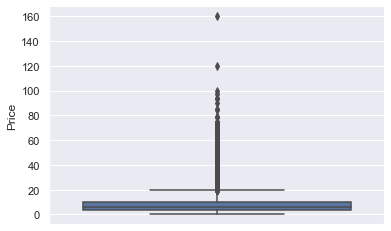

In [33]:
sns.boxplot(data = df , y = 'Price' )

In [34]:
df[df['Price'] > 70]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
282,Audi Q7,Kochi,2018,11287,Diesel,Automatic,1.0,19.4327,2967,241.40,7.0,70.36
418,Mercedes-Benz GLC,Coimbatore,2018,22397,Petrol,Automatic,1.0,18.5150,2996,367.00,5.0,70.99
655,Jaguar XJ,Mumbai,2017,10501,Petrol,Automatic,1.0,15.1823,1999,237.40,5.0,75.00
1505,Land Rover,Kochi,2019,26013,Diesel,Automatic,1.0,20.3665,2993,255.00,5.0,97.07
1583,Audi Q7,Kochi,2019,6773,Diesel,Automatic,1.0,23.7475,2967,245.00,7.0,72.94
1690,Mercedes-Benz GLE,Coimbatore,2018,40129,Diesel,Automatic,1.0,18.6277,2987,254.79,5.0,70.80
1885,Mercedes-Benz GLS,Delhi,2018,6000,Diesel,Automatic,1.0,17.7100,2987,258.00,7.0,79.00
1974,BMW 7,Coimbatore,2018,28060,Petrol,Automatic,1.0,19.4005,2979,320.00,5.0,93.67
1984,BMW 7,Bangalore,2017,17465,Petrol,Automatic,1.0,19.4005,2979,320.00,5.0,93.00
2095,Mercedes-Benz SLC,Coimbatore,2019,2526,Petrol,Automatic,1.0,30.5900,2996,362.07,2.0,83.96


In [35]:
df.drop(df[df['Price'] > 70].index,inplace=True)

In [36]:
df.quantile([0.01,0.25,0.5,0.75,0.95,0.97,0.99,0.995,1])

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price
0.010,2004.0,4062.28,1.0,15.100000,796.0,38.4000,4.0,0.9900
0.250,2012.0,33694.75,1.0,24.604225,1198.0,75.0000,5.0,3.5025
0.500,2014.0,52897.50,1.0,29.302000,1495.0,94.0000,5.0,5.7000
0.750,2016.0,72421.50,1.0,33.971000,1984.0,138.1000,5.0,10.0000
0.950,2018.0,120000.00,2.0,40.894000,2982.0,203.0000,7.0,31.7975
0.970,2018.0,135000.00,2.0,41.860000,2987.0,241.4000,7.0,38.0000
0.990,2019.0,170000.00,3.0,45.224900,2996.0,271.5191,8.0,51.4831
0.995,2019.0,199795.00,3.0,45.724000,3498.0,313.0000,8.0,58.4293
1.000,2019.0,6500000.00,3.0,45.724000,5998.0,552.0000,10.0,70.0000


<AxesSubplot:ylabel='Engine'>

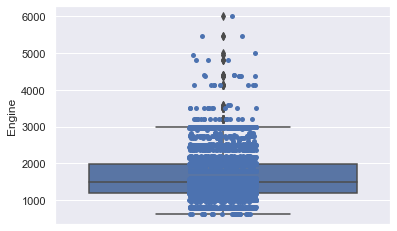

In [37]:
sns.boxplot(data = df , y = 'Engine' )
sns.stripplot(data = df , y = 'Engine' )

In [38]:
df[df['Engine'] > 3200]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
70,Porsche Cayenne,Mumbai,2008,73000,Petrol,Automatic,1.0,13.6850,4806,500.00,5.0,14.50
152,Mercedes-Benz S,Kolkata,2010,35277,Petrol,Automatic,1.0,12.5741,5461,362.90,5.0,30.00
459,Audi Q7,Coimbatore,2016,51002,Diesel,Automatic,1.0,18.2413,4134,335.20,7.0,48.91
586,Audi Q7,Kochi,2014,79926,Diesel,Automatic,1.0,18.2413,4134,335.20,7.0,29.77
589,Mercedes-Benz S,Bangalore,2006,47088,Petrol,Automatic,2.0,16.3093,3498,364.90,5.0,19.00
693,Mercedes-Benz SLK-Class,Coimbatore,2016,22732,Petrol,Automatic,1.0,29.1410,3498,306.00,2.0,55.54
798,Mercedes-Benz SLK-Class,Bangalore,2015,10000,Petrol,Automatic,1.0,29.1410,3498,306.00,2.0,55.00
1038,Land Rover,Bangalore,2011,55000,Diesel,Automatic,1.0,16.4220,4367,308.00,7.0,67.00
1093,Audi Q7,Bangalore,2014,50000,Diesel,Automatic,1.0,18.2413,4134,335.20,7.0,51.00
1352,Land Rover,Bangalore,2012,66538,Diesel,Automatic,1.0,16.4220,4367,308.00,7.0,70.00


In [39]:
df.drop(df[df['Engine'] > 3200].index,inplace = True)

<AxesSubplot:ylabel='Power'>

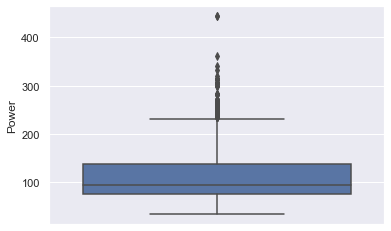

In [40]:
sns.boxplot(data = df , y = 'Power' )

In [41]:
df[df['Power'] > 300]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
134,Mercedes-Benz SLC,Kolkata,2017,13372,Petrol,Automatic,1.0,30.5900,2996,362.07,2.0,54.00
148,Audi RS5,Mumbai,2013,23000,Petrol,Automatic,1.0,17.7905,2894,444.00,4.0,37.00
326,BMW 6,Mumbai,2011,30000,Diesel,Automatic,1.0,15.3272,2993,313.00,4.0,49.00
1123,BMW 7,Pune,2008,66000,Petrol,Automatic,2.0,13.6045,2979,321.00,5.0,10.75
1741,BMW X6,Hyderabad,2013,58000,Diesel,Automatic,1.0,18.0320,2993,306.00,4.0,48.00
2089,BMW 6,Mumbai,2013,30000,Diesel,Automatic,1.0,15.3272,2993,313.00,4.0,45.00
2515,BMW 6,Delhi,2013,21000,Diesel,Automatic,2.0,28.2394,2993,313.00,4.0,44.00
2547,BMW X6,Chennai,2016,25000,Diesel,Automatic,1.0,25.5507,2993,308.43,5.0,60.00
3132,Porsche Cayenne,Kochi,2019,14298,Petrol,Automatic,1.0,21.4613,2995,340.00,5.0,2.02
3266,Mercedes-Benz E-Class,Kolkata,2015,7501,Petrol,Automatic,1.0,16.1000,2996,333.00,4.0,48.00


In [42]:
df.drop(df[df['Power'] > 300].index,inplace = True)

<AxesSubplot:ylabel='Kilometers_Driven'>

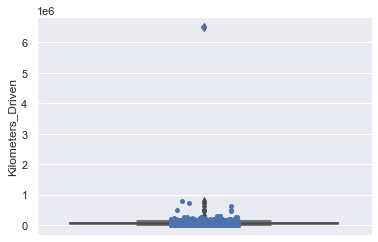

In [43]:
sns.boxplot(data = df , y = 'Kilometers_Driven' )
sns.stripplot(data = df , y = 'Kilometers_Driven' )

In [44]:
df[df['Kilometers_Driven'] > 170000]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
64,Tata Indica,Chennai,2016,178000,Diesel,Manual,1.0,40.2500,1396,69.00,5.0,2.50
77,Toyota Innova,Chennai,2006,230000,Petrol,Manual,3.0,19.9640,1998,132.00,8.0,4.50
181,Ford Fiesta,Chennai,2006,216000,Diesel,Manual,2.0,28.6580,1399,68.00,5.0,1.45
230,Tata Indica,Jaipur,2007,200000,Diesel,Manual,2.0,27.6920,1396,53.50,5.0,0.85
340,Skoda Octavia,Kolkata,2013,775000,Diesel,Automatic,1.0,31.0730,1968,141.00,5.0,7.50
358,Hyundai i10,Chennai,2009,620000,Petrol,Manual,1.0,32.7796,1197,78.90,5.0,2.70
482,Ford Endeavour,Hyderabad,2008,179000,Diesel,Automatic,2.0,20.6080,2953,156.00,7.0,4.24
556,Toyota Etios,Chennai,2013,179000,Diesel,Manual,1.0,37.9799,1364,67.04,5.0,3.80
576,Audi A6,Hyderabad,2012,202082,Diesel,Automatic,1.0,28.4648,1968,174.33,5.0,12.30
792,Ford Endeavour,Jaipur,2008,205000,Diesel,Manual,2.0,21.0910,2499,141.00,7.0,3.90


In [45]:
df.drop(df[df['Kilometers_Driven'] > 170000].index,inplace = True)

In [46]:
df.to_csv('Clean_Data.csv')

In [47]:
# Data Spliting
x = df.drop(columns= 'Price')
y = df['Price']

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x ,y ,test_size = 0.25 ,random_state = 40)

In [48]:
# Preprocessing
from sklearn.preprocessing import RobustScaler
from category_encoders import BinaryEncoder
from sklearn.compose import ColumnTransformer

cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(exclude='object').columns.tolist()
num_cols.remove('Price')

Preprocessor = ColumnTransformer([('Categorical',BinaryEncoder(),cat_cols),('Numerical',RobustScaler(),num_cols)])

x_train_preprocessed = Preprocessor.fit_transform(x_train)
x_test_preprocessed = Preprocessor.transform(x_test)

In [49]:
# Model Building 
#Linear Regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_preprocessed , y_train)

#Model evaluatian
from sklearn.metrics import r2_score , mean_squared_error
y_pred = lr.predict(x_test_preprocessed)
print('R2 Score: ', r2_score(y_test,y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_pred,y_test)))

R2 Score:  0.7461109836516355
RMSE:  4.985234231172631


In [50]:
# Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train_preprocessed,y_train)

#Model evaluatian
y_pred = ridge.predict(x_test_preprocessed)
print('R2 Score: ', r2_score(y_test,y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_pred,y_test)))

R2 Score:  0.7461249024804624
RMSE:  4.985097577815264


In [51]:
# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly = make_pipeline(PolynomialFeatures(2),Ridge())
poly.fit(x_train_preprocessed,y_train)

#Model evaluatian
y_pred = poly.predict(x_test_preprocessed)
print('R2 Score: ', r2_score(y_test,y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_pred,y_test)))

R2 Score:  0.8975676684422553
RMSE:  3.166519312039197


In [52]:
# log Transform
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [53]:
# Linear Regression
lr = LinearRegression()
lr.fit(x_train_preprocessed , y_train_log)

#Model evaluatian
y_pred = lr.predict(x_test_preprocessed)
print('R2 Score: ', r2_score(y_test_log,y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_pred,y_test_log)))

R2 Score:  0.8942612198795894
RMSE:  0.23452383471593746


In [54]:
# Polynomial Regression
poly = make_pipeline(PolynomialFeatures(2),Ridge())
poly.fit(x_train_preprocessed,y_train_log)

#Model evaluatian
y_pred = poly.predict(x_test_preprocessed)
print('R2 Score: ', r2_score(y_test_log,y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_pred,y_test_log)))

R2 Score:  0.9258853497805318
RMSE:  0.19634591517055816


# Saving

In [55]:
import pickle
#Preprocessor Saving
pickle.dump(Preprocessor,open('Preprocessor.pkl','wb'))

#Model Saving
pickle.dump(poly,open('Model.pkl','wb'))

# Streamlit

In [56]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import pickle
import sklearn


st.title('Cars Price Prediction')
st.image('car.png')
#Load data
df = pd.read_csv('Clean_Data.csv')
preprocessor = pickle.load(open('Preprocessor.pkl','rb'))
model = pickle.load(open('Model.pkl','rb'))

# App

Name = st.selectbox('Car Model',df['Name'].unique())
Location = st.selectbox('Location',df['Location'].unique())
year = st.number_input('Year',df['Year'].min() ,df['Year'].max())
Kilometers_Driven = st.number_input('Kilometers Driven',df['Kilometers_Driven'].min()  ,df['Kilometers_Driven'].max()  )
Fuel_Type = st.selectbox('Fuel Type',df['Fuel_Type'].unique())
Transmission = st.selectbox('Transmission',df['Transmission'].unique())
Owner_Type = st.selectbox('Owner Type',df['Owner_Type'].unique())
Mileage = st.number_input('Mileage',df['Mileage'].min() ,df['Mileage'].max() )
Engine = st.number_input('Engine',df['Engine'].min() ,df['Engine'].max() )
Power = st.number_input('Power',df['Power'].min() ,df['Power'].max() )
Seats = st.selectbox('Seats',df['Seats'].unique())

new_data = {'Name': Name , 'Location': Location ,'Year':year , 'Kilometers_Driven':Kilometers_Driven ,
            'Fuel_Type':Fuel_Type , 'Transmission':Transmission , 'Owner_Type':Owner_Type , 
           'Mileage':Mileage,'Engine':Engine,'Power':Power , 'Seats':Seats}
new_data = pd.DataFrame(new_data,index=[0])

#Preprocessed
new_data_preprocessed = preprocessor.transform(new_data)

log_price = model.predict(new_data_preprocessed)
price = np.expm1(log_price)
price_usd = price[0] * 1219

# Output
if st.button('Predict'):
    st.markdown('## Price in USD:')
    st.markdown(price_usd.round(2))

Overwriting app.py


In [ ]:
!streamlit run app.py 